In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import math
from datetime import datetime
import statsmodels.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
def clean_up_columns(data):
    df=pd.DataFrame()
    for old_name in data.columns:
        new_name = old_name.split('TRc1')[0][:-1]
        df[new_name]=data[old_name]
    return df
data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='last')
price = clean_up_columns(data)
data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='mean')
vol = clean_up_columns(data)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


In [46]:
tstats=pd.DataFrame()
for mkt in price.columns:
    d=pd.Series()
    Y=price[mkt].resample(rule='m',how='last').pct_change().dropna()
    Y=(Y/pd.rolling_std(Y,12)).dropna()[:'2016']
    for i in range(1,36):
        X = pd.DataFrame()
        X['month']=pd.rolling_mean(Y,i).shift(1).dropna()
        X['Alpha']=1
        try:
            r= sm.OLS(Y[i:],X).fit()
        except:
            print mkt
            continue
        d['T-'+str(i)]=r.tvalues.month
    tstats[mkt]=d

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: pd.roll

ZCE-NONGLUTINOUS RICE
ZCE-NONGLUTINOUS RICE
ZCE-NONGLUTINOUS RICE
ZCE-NONGLUTINOUS RICE
ZCE-NONGLUTINOUS RICE
ZCE-NONGLUTINOUS RICE
ZCE-NONGLUTINOUS RICE
ZCE-NONGLUTINOUS RICE
ZCE-NONGLUTINOUS RICE
ZCE-NONGLUTINOUS RICE
ZCE-NONGLUTINOUS RICE
ZCE-NONGLUTINOUS RICE
DCE-PLYWOOD
DCE-PLYWOOD
DCE-PLYWOOD
DCE-PLYWOOD
DCE-PLYWOOD
DCE-PLYWOOD
DCE-PLYWOOD
DCE-FIBERBOARD
DCE-FIBERBOARD
DCE-FIBERBOARD
DCE-FIBERBOARD
DCE-FIBERBOARD
DCE-FIBERBOARD
DCE-FIBERBOARD
DCE-EGG
DCE-EGG
SHFE-HOT ROLLED COIL
SHFE-HOT ROLLED COIL
SHFE-HOT ROLLED COIL
SHFE-HOT ROLLED COIL
SHFE-HOT ROLLED COIL
SHFE-HOT ROLLED COIL
SHFE-HOT ROLLED COIL
SHFE-HOT ROLLED COIL
SHFE-HOT ROLLED COIL
SHFE-HOT ROLLED COIL
SHFE-HOT ROLLED COIL
SHFE-HOT ROLLED COIL


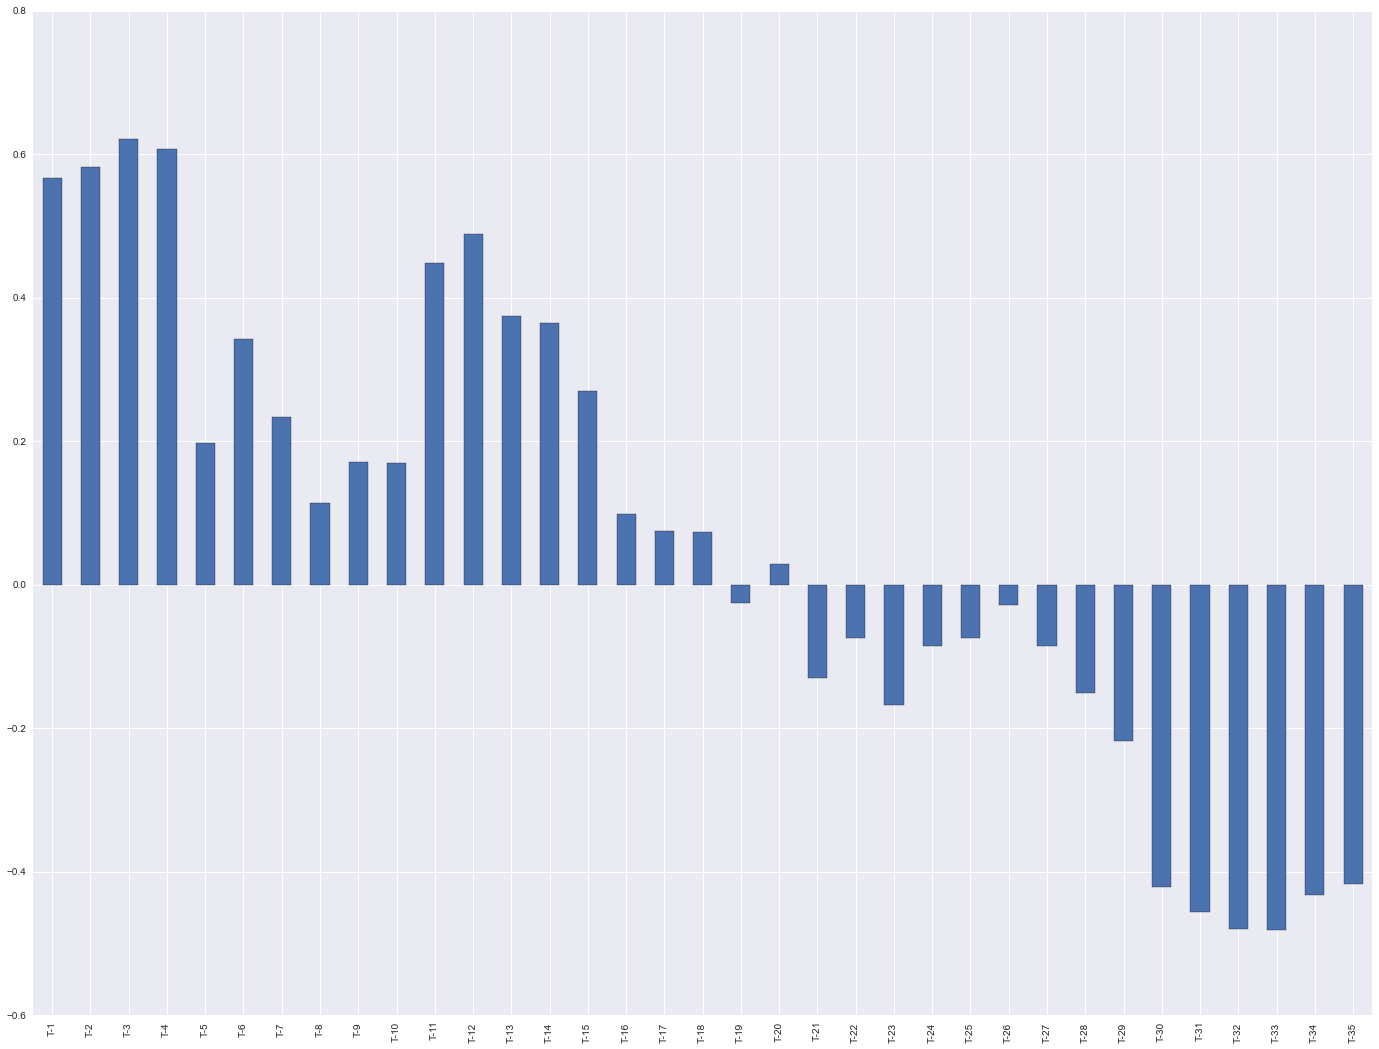

In [47]:
tstats.median(axis=1).plot(kind='bar')

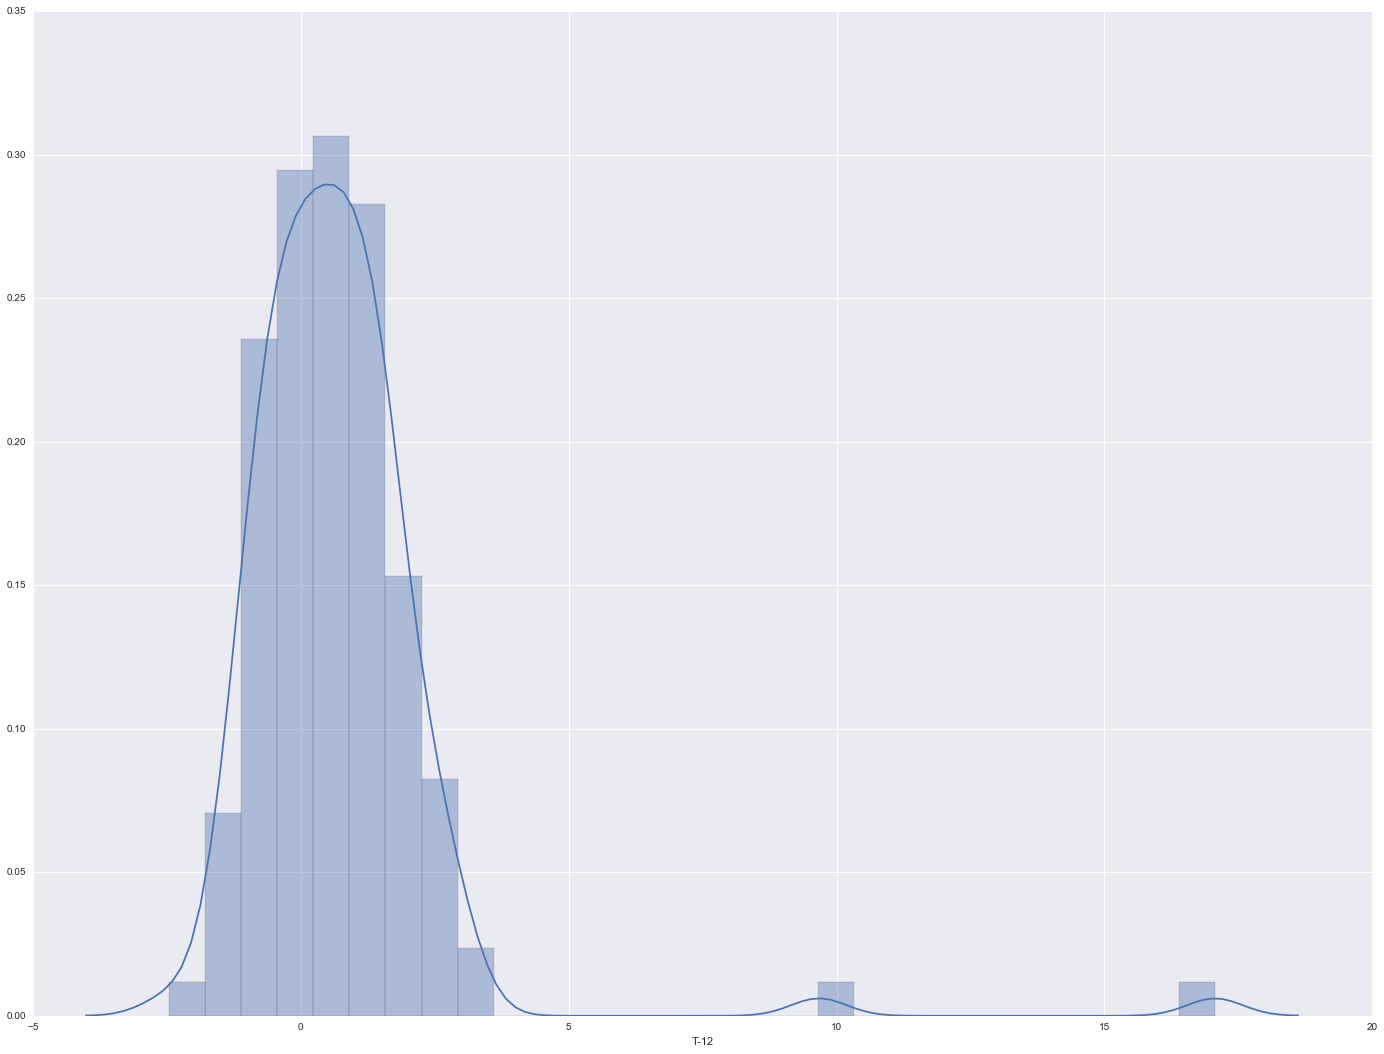

In [48]:
sns.distplot(tstats.T['T-12'].dropna())